## Data is one csv file which contains four sections Source,Video Characteristic,Encoding Setting and Target Value

Video_data_set.csv - A collected data from videos

## Source Viedo
    s_video_id - Identifer for the original video (numerical)
    s_width - Resolution of the raw video (numerical)
    s_height - Resolution of the raw video (numerical)
    s_storage_size - the total size of the source video without audio tracks (numerical)
    s_duration - Length of the source video (numerical)
    s_scan_type - "progressive" or "interlaced"(categorical)

## Video Characteristic
    c_content_category - A label indicating the category of the video with the highest probability(categorical)
    c_scene_change_ffmp_ratio30 - Indicates how many scene changes appear per minute on average in the video for a given probability 30%(numerical)
    c_scene_change_ffmp_ratio60 - Indicates how many scene changes appear per minute on average in the video for a given probability 60%(numerical)
    c_scene_change_ffmp_ratio90 - Indicates how many scene changes appear per minute on average in the video for a given probability 90%(numerical)
    c_scene_change_py_thresh30 - Indicates how many scene changes appear throughout entire clip with threshold 30(numerical)
    c_scene_change_py_thresh50 - Indicates how many scene changes appear throughout entire clip with threshold 50(numerical)
    c_si - The spatial perceptual information (SI) based on the Sobel filter averaged over the whole video(numerical)
    c_ti - The temporal perceptual information (TI) based upon the motion difference feature averaged over the whole video(numerical)
    c_colorhistogram_mean_dark - color values between [0-63] are grouped in this block (dark)population mean of RGB color values normalised - divide by pixel count & divide by channel count mean of mean over all frames of a video(numerical)
    c_colorhistogram_mean_medium_dark - color values between [64-127] (numerical)
    c_colorhistogram_mean_medium_bright - color values between [128-195] (numerical)
    c_colorhistogram_mean_bright - color values between [196-255] (numerical)
    c_colorhistogram_std_dev_dark - standard deviation of c_colorhistogram_mean_medium_dark within each frame mean of all frames of a video(numerical)
    c_colorhistogram_std_dev_medium_dark - standard deviation of c_colorhistogram_mean_medium_bright within each frame mean of all frames of a video(numerical)
    c_colorhistogram_std_dev_medium_bright - standard deviation of c_colorhistogram_mean_medium_bright within each frame mean of all frames of a video(numerical)
    c_colorhistogram_std_dev_bright - standard deviation of c_colorhistogram_mean_bright within each frame mean of all frames of a video(numerical)
    c_colorhistogram_temporal_mean_std_dev_dark - temporal standard deviation of mean of c_colorhistogram_mean_dark(numerical)
    c_colorhistogram_temporal_mean_std_dev_medium_dark - temporal standard deviation of mean of c_colorhistogram_mean_medium_dark(numerical)
    c_colorhistogram_temporal_mean_std_dev_medium_bright - temporal standard deviation of mean of c_colorhistogram_mean_medium_bright(numerical)
    c_colorhistogram_temporal_mean_std_dev_bright - temporal standard deviation of mean of c_colorhistogram_mean_bright(numerical)

## Encoding Setting
    e_crf - Constant Rate Factor for this encoding(numerical)
    e_width - Target Resolution of the encoded video(numerical)
    e_height - Target Resolution of the encoded video(numerical)
    e_aspect_ratio - Aspect ratio of the video(numerical)
    e_pixel_aspect_ratio - Aspect ratio of the pixels. Usually 1:1 = 1(numerical)
    e_codec - Video Codec e.g H.264, H.265, VP9, AV1.(categorical)
    e_codec_profile - Video Codec Profile e.g baseline, main, high. Depending on the profile certain encoder features are disabled/enabled(categorical)
    e_codec_level - Video Codec Level: Specified set of constraints that indicate a degree of required decoder performance for a profile.(ordered categorical)
    e_framerate - Frames per second(numerical)
    e_gop_size - number of frames between two I-frames(numerical)
    e_b_frame_int - number of b frames per interval(numerical)
    e_ref_frame_count - Reference frames are frames of a compressed video that are used to define future frames.(numerical)
    e_scan_type - "progressive" or "interlaced"(categorical)
    e_bit_depth - Amount of information stored in each pixel of data. also known as 'color depth'(numerical)
    e_pixel_fmt - color models like YUV, RGB, YPbPr, etc.(categorical)

## Target Value
    t_average_bitrate - Average Bitrate as encoding setting(numerical)
    t_average_vmaf - quality metric((numerical)
    t_average_vmaf_mobile - No Value
    t_average_vmaf_4k - No Value
    t_average_psnr - No Value

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from numpy import math
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'/Users/user/One_to_one_techmentor_classes/video_quality_matrix_production/raw_data/Video_data_set.csv', sep = ",")
df.head() # df.tail()

,s_video_id,s_width,s_height,s_storage_size,s_duration,s_scan_type,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,...,e_b_frame_int,e_ref_frame_count,e_scan_type,e_bit_depth,e_pixel_fmt,t_average_bitrate,t_average_vmaf,t_average_vmaf_mobile,t_average_vmaf_4k,t_average_psnr
0,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3,1.0,progressive,8.0,yuv420p,31214,97.204616,NaN,NaN,NaN
1,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3,1.0,progressive,8.0,yuv420p,2750,67.255472,NaN,NaN,NaN
2,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3,1.0,progressive,8.0,yuv420p,10777,90.423618,NaN,NaN,NaN
3,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3,1.0,progressive,8.0,yuv420p,5990,83.276829,NaN,NaN,NaN
4,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3,1.0,progressive,8.0,yuv420p,3766,75.562682,NaN,NaN,NaN


In [3]:
pwd  # Code for detecting working directory

'C:\\Users\\User\\One_to_one_techmentor_classes\\video_quality_matrix_production\\Codes'

In [4]:
df.shape

(10570, 46)

In [5]:
df1 = df.drop (["e_codec",
              "e_codec_profile",
              "e_scan_type",
              "e_pixel_aspect_ratio",
              "e_pixel_fmt",
              "e_aspect_ratio",
              "e_b_frame_int",
              "e_ref_frame_count",
              "t_average_vmaf_mobile",
              "e_bit_depth",
              "t_average_vmaf_4k",
              "t_average_psnr"], axis = 1)

In [6]:
df1.head()

,s_video_id,s_width,s_height,s_storage_size,s_duration,s_scan_type,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,...,c_colorhistogram_temporal_mean_std_dev_medium_bright,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf
0,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,0.100943,0.110025,18,1920,1080,42.0,50.0,100.0,31214,97.204616
1,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,0.100943,0.110025,18,640,360,31.0,50.0,100.0,2750,67.255472
2,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,0.100943,0.110025,18,1280,720,32.0,50.0,100.0,10777,90.423618
3,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,0.100943,0.110025,18,960,540,31.0,50.0,100.0,5990,83.276829
4,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,0.100943,0.110025,18,768,432,31.0,50.0,100.0,3766,75.562682


In [7]:
df1.isnull().sum()   #df1.isna()

s_video_id                                                0
s_width                                                   0
s_height                                                  0
s_storage_size                                            0
s_duration                                                0
s_scan_type                                               0
c_content_category                                      247
c_si                                                    806
c_ti                                                    806
c_scene_change_ffmpeg_ratio30                             0
c_scene_change_ffmpeg_ratio60                             0
c_scene_change_ffmpeg_ratio90                             0
c_scene_change_py_thresh30                                0
c_scene_change_py_thresh50                                0
c_colorhistogram_mean_dark                              156
c_colorhistogram_mean_medium_dark                       156
c_colorhistogram_mean_medium_bright     

In [8]:
dup = df1.duplicated()

In [9]:
dup

0        False
1        False
2        False
3        False
4        False
         ...  
10565    False
10566    False
10567    False
10568    False
10569    False
Length: 10570, dtype: bool

In [10]:
dup.sum()

614

In [11]:
df1.dropna(inplace=True)

In [12]:
df1.isnull().sum()

s_video_id                                              0
s_width                                                 0
s_height                                                0
s_storage_size                                          0
s_duration                                              0
s_scan_type                                             0
c_content_category                                      0
c_si                                                    0
c_ti                                                    0
c_scene_change_ffmpeg_ratio30                           0
c_scene_change_ffmpeg_ratio60                           0
c_scene_change_ffmpeg_ratio90                           0
c_scene_change_py_thresh30                              0
c_scene_change_py_thresh50                              0
c_colorhistogram_mean_dark                              0
c_colorhistogram_mean_medium_dark                       0
c_colorhistogram_mean_medium_bright                     0
c_colorhistogr

In [13]:
df1.drop_duplicates(inplace=True)

In [14]:
df1.shape

(8705, 34)

In [15]:
df1.sort_values(by=['s_video_id'], inplace=True)

In [16]:
df1.reset_index(inplace=True,drop=True)

In [17]:
df1

,s_video_id,s_width,s_height,s_storage_size,s_duration,s_scan_type,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,...,c_colorhistogram_temporal_mean_std_dev_medium_bright,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf
0,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,18,1920,1080,42.0,50.0,100.0,31214,97.204616
1,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,640,360,31.0,50.0,100.0,139,16.131526
2,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,960,540,31.0,50.0,100.0,277,26.354270
3,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,1280,720,32.0,50.0,100.0,458,33.988482
4,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,1920,1080,42.0,50.0,100.0,999,47.304090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,24,1920,1080,40.0,25.0,50.0,7399,96.708567
8701,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,24,960,540,31.0,25.0,50.0,2068,82.000473
8702,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,22,416,234,13.0,25.0,50.0,708,44.293122
8703,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,26,1920,1080,40.0,25.0,50.0,5407,95.099900


In [18]:
df1_c = df1.copy()

In [19]:
df1_c

,s_video_id,s_width,s_height,s_storage_size,s_duration,s_scan_type,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,...,c_colorhistogram_temporal_mean_std_dev_medium_bright,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf
0,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,18,1920,1080,42.0,50.0,100.0,31214,97.204616
1,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,640,360,31.0,50.0,100.0,139,16.131526
2,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,960,540,31.0,50.0,100.0,277,26.354270
3,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,1280,720,32.0,50.0,100.0,458,33.988482
4,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.100943,0.110025,40,1920,1080,42.0,50.0,100.0,999,47.304090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,24,1920,1080,40.0,25.0,50.0,7399,96.708567
8701,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,24,960,540,31.0,25.0,50.0,2068,82.000473
8702,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,22,416,234,13.0,25.0,50.0,708,44.293122
8703,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,0.000000,26,1920,1080,40.0,25.0,50.0,5407,95.099900


In [20]:
df1_c["resolution"] = df1_c["e_width"] * df1_c["e_height"]

In [21]:
df1_c

,s_video_id,s_width,s_height,s_storage_size,s_duration,s_scan_type,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,...,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf,resolution
0,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.110025,18,1920,1080,42.0,50.0,100.0,31214,97.204616,2073600
1,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.110025,40,640,360,31.0,50.0,100.0,139,16.131526,230400
2,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.110025,40,960,540,31.0,50.0,100.0,277,26.354270,518400
3,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.110025,40,1280,720,32.0,50.0,100.0,458,33.988482,921600
4,8,1920,1080,521709628,65,progressive,maze,63.040,14.480,11.076923,...,0.110025,40,1920,1080,42.0,50.0,100.0,999,47.304090,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,24,1920,1080,40.0,25.0,50.0,7399,96.708567,2073600
8701,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,24,960,540,31.0,25.0,50.0,2068,82.000473,518400
8702,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,22,416,234,13.0,25.0,50.0,708,44.293122,97344
8703,327,1920,1080,4273167580,570,progressive,collie,49.103,19.925,8.842105,...,0.000000,26,1920,1080,40.0,25.0,50.0,5407,95.099900,2073600


In [22]:
df1_c["scn_chng_avg"] = df1_c["c_scene_change_ffmpeg_ratio60"] * 60 / df1_c["s_duration"]

In [23]:
df1_c.columns

Index(['s_video_id', 's_width', 's_height', 's_storage_size', 's_duration',
       's_scan_type', 'c_content_category', 'c_si', 'c_ti',
       'c_scene_change_ffmpeg_ratio30', 'c_scene_change_ffmpeg_ratio60',
       'c_scene_change_ffmpeg_ratio90', 'c_scene_change_py_thresh30',
       'c_scene_change_py_thresh50', 'c_colorhistogram_mean_dark',
       'c_colorhistogram_mean_medium_dark',
       'c_colorhistogram_mean_medium_bright', 'c_colorhistogram_mean_bright',
       'c_colorhistogram_std_dev_dark', 'c_colorhistogram_std_dev_medium_dark',
       'c_colorhistogram_std_dev_medium_bright',
       'c_colorhistogram_std_dev_bright',
       'c_colorhistogram_temporal_mean_std_dev_dark',
       'c_colorhistogram_temporal_mean_std_dev_medium_dark',
       'c_colorhistogram_temporal_mean_std_dev_medium_bright',
       'c_colorhistogram_temporal_mean_std_dev_bright', 'e_crf', 'e_width',
       'e_height', 'e_codec_level', 'e_framerate', 'e_gop_size',
       't_average_bitrate', 't_average_vma

In [24]:
df1_c["scn_chng_avg"]

0       0.852071
1       0.852071
2       0.852071
3       0.852071
4       0.852071
          ...   
8700    0.077562
8701    0.077562
8702    0.077562
8703    0.077562
8704    0.077562
Name: scn_chng_avg, Length: 8705, dtype: float64

<Axes: xlabel='scn_chng_avg'>

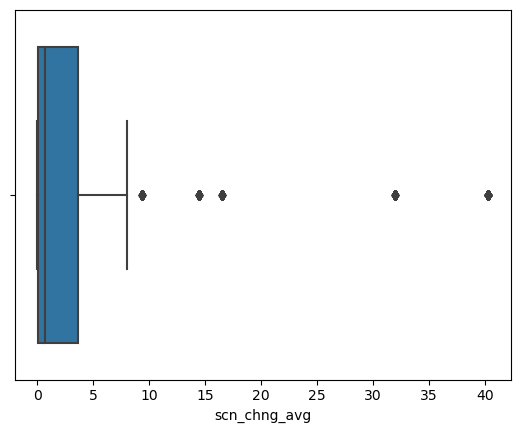

In [25]:
sns.boxplot(x=df1_c["scn_chng_avg"])

<Axes: xlabel='t_average_bitrate'>

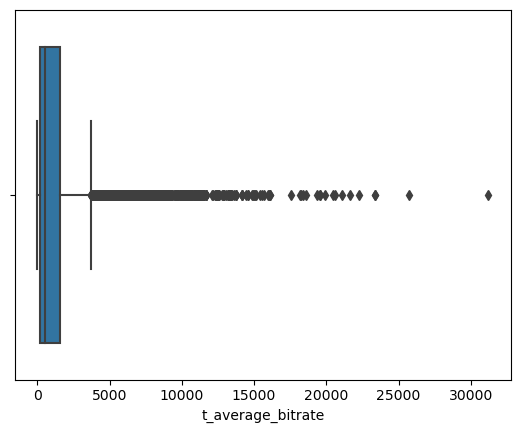

In [26]:
sns.boxplot(x=df1_c['t_average_bitrate'])

<Axes: ylabel='s_duration'>

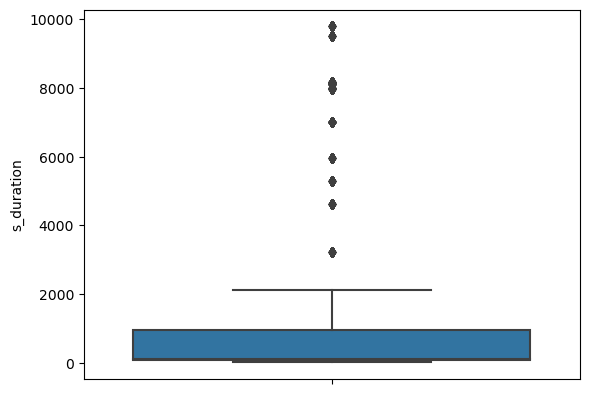

In [27]:
sns.boxplot(y=df1_c['s_duration'])

In [28]:
df1_c['s_duration'].describe()

count    8705.000000
mean     1076.245376
std      2254.292536
min        10.000000
25%        65.000000
50%        96.000000
75%       961.000000
max      9790.000000
Name: s_duration, dtype: float64

In [29]:
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8705 entries, 0 to 8704
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   s_video_id                                            8705 non-null   int64  
 1   s_width                                               8705 non-null   int64  
 2   s_height                                              8705 non-null   int64  
 3   s_storage_size                                        8705 non-null   int64  
 4   s_duration                                            8705 non-null   int64  
 5   s_scan_type                                           8705 non-null   object 
 6   c_content_category                                    8705 non-null   object 
 7   c_si                                                  8705 non-null   float64
 8   c_ti                                                  8705

In [30]:
df1_c['t_average_bitrate'].describe()

count     8705.000000
mean      1409.624009
std       2317.028275
min          8.000000
25%        155.000000
50%        544.000000
75%       1588.000000
max      31214.000000
Name: t_average_bitrate, dtype: float64

In [31]:
df1_c["scn_chng_avg"].describe()

count    8705.000000
mean        2.906840
std         6.310917
min         0.000000
25%         0.041656
50%         0.714144
75%         3.635905
max        40.320000
Name: scn_chng_avg, dtype: float64

In [32]:
shape = df1_c['t_average_bitrate'].shape[0]
irange = df1_c['t_average_bitrate'].describe()[6]-df1_c['t_average_bitrate'].describe()[4]
irange_f = irange * 3
max_th = df1_c['t_average_bitrate'].describe()[6] + irange_f
for i in range(shape):
    if(df1_c.iloc[i, 32:33].values[0]>=max_th):
        df1_c.iloc[i, 32:33] = np.nan

In [33]:
df1_c.isnull().sum()

s_video_id                                                0
s_width                                                   0
s_height                                                  0
s_storage_size                                            0
s_duration                                                0
s_scan_type                                               0
c_content_category                                        0
c_si                                                      0
c_ti                                                      0
c_scene_change_ffmpeg_ratio30                             0
c_scene_change_ffmpeg_ratio60                             0
c_scene_change_ffmpeg_ratio90                             0
c_scene_change_py_thresh30                                0
c_scene_change_py_thresh50                                0
c_colorhistogram_mean_dark                                0
c_colorhistogram_mean_medium_dark                         0
c_colorhistogram_mean_medium_bright     

In [34]:
df1_c.dropna(inplace=True)

In [35]:
shape_d = df1_c['s_duration'].shape[0]
irange_d = df1_c['s_duration'].describe()[6]-df1_c['s_duration'].describe()[4]
irange_df = irange_d * 3
max_th_d = df1_c['s_duration'].describe()[6] + irange_df
for i in range(shape_d):
    if(df1_c.iloc[i, 4:5].values[0]>=max_th_d):
        df1_c.iloc[i, 4:5] = np.nan

In [36]:
df1_c.dropna(inplace=True)

In [37]:
df1_c.isnull().sum()

s_video_id                                              0
s_width                                                 0
s_height                                                0
s_storage_size                                          0
s_duration                                              0
s_scan_type                                             0
c_content_category                                      0
c_si                                                    0
c_ti                                                    0
c_scene_change_ffmpeg_ratio30                           0
c_scene_change_ffmpeg_ratio60                           0
c_scene_change_ffmpeg_ratio90                           0
c_scene_change_py_thresh30                              0
c_scene_change_py_thresh50                              0
c_colorhistogram_mean_dark                              0
c_colorhistogram_mean_medium_dark                       0
c_colorhistogram_mean_medium_bright                     0
c_colorhistogr

In [38]:
shape_sn = df1_c['scn_chng_avg'].shape[0]
irange_sn = df1_c['scn_chng_avg'].describe()[6]-df1_c['scn_chng_avg'].describe()[4]
irange_snf = irange_sn * 3
max_th_sn = df1_c['scn_chng_avg'].describe()[6] + irange_snf
for i in range(shape_sn):
    if(df1_c.iloc[i, 35:36].values[0]>=max_th_sn):
        df1_c.iloc[i, 35:36] = np.nan

In [39]:
df1_c.isnull().sum()

s_video_id                                                0
s_width                                                   0
s_height                                                  0
s_storage_size                                            0
s_duration                                                0
s_scan_type                                               0
c_content_category                                        0
c_si                                                      0
c_ti                                                      0
c_scene_change_ffmpeg_ratio30                             0
c_scene_change_ffmpeg_ratio60                             0
c_scene_change_ffmpeg_ratio90                             0
c_scene_change_py_thresh30                                0
c_scene_change_py_thresh50                                0
c_colorhistogram_mean_dark                                0
c_colorhistogram_mean_medium_dark                         0
c_colorhistogram_mean_medium_bright     

In [40]:
df1_c.dropna(inplace=True)

<Axes: ylabel='scn_chng_avg'>

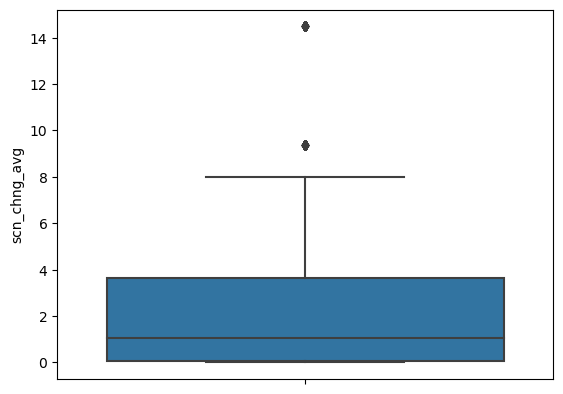

In [41]:
sns.boxplot(y=df1_c['scn_chng_avg'])

In [42]:
df1_c.columns

Index(['s_video_id', 's_width', 's_height', 's_storage_size', 's_duration',
       's_scan_type', 'c_content_category', 'c_si', 'c_ti',
       'c_scene_change_ffmpeg_ratio30', 'c_scene_change_ffmpeg_ratio60',
       'c_scene_change_ffmpeg_ratio90', 'c_scene_change_py_thresh30',
       'c_scene_change_py_thresh50', 'c_colorhistogram_mean_dark',
       'c_colorhistogram_mean_medium_dark',
       'c_colorhistogram_mean_medium_bright', 'c_colorhistogram_mean_bright',
       'c_colorhistogram_std_dev_dark', 'c_colorhistogram_std_dev_medium_dark',
       'c_colorhistogram_std_dev_medium_bright',
       'c_colorhistogram_std_dev_bright',
       'c_colorhistogram_temporal_mean_std_dev_dark',
       'c_colorhistogram_temporal_mean_std_dev_medium_dark',
       'c_colorhistogram_temporal_mean_std_dev_medium_bright',
       'c_colorhistogram_temporal_mean_std_dev_bright', 'e_crf', 'e_width',
       'e_height', 'e_codec_level', 'e_framerate', 'e_gop_size',
       't_average_bitrate', 't_average_vma

In [43]:
corr_df1_c = df1_c.corr(method = 'pearson') # Taken from pandas library

C:\Users\User\AppData\Local\Temp\ipykernel_11636\2091620801.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df1_c = df1_c.corr(method = 'pearson') # Taken from pandas library


In [44]:
print(corr_df1_c)

                                                    s_video_id   s_width  \
s_video_id                                            1.000000 -0.239396   
s_width                                              -0.239396  1.000000   
s_height                                             -0.242534  0.852059   
s_storage_size                                        0.253674 -0.134084   
s_duration                                            0.408446  0.057031   
c_si                                                  0.070066 -0.353231   
c_ti                                                 -0.040294  0.077045   
c_scene_change_ffmpeg_ratio30                        -0.138699  0.149915   
c_scene_change_ffmpeg_ratio60                        -0.306206  0.096415   
c_scene_change_ffmpeg_ratio90                        -0.164896  0.073686   
c_scene_change_py_thresh30                            0.068556  0.089021   
c_scene_change_py_thresh50                            0.086885  0.025617   
c_colorhisto

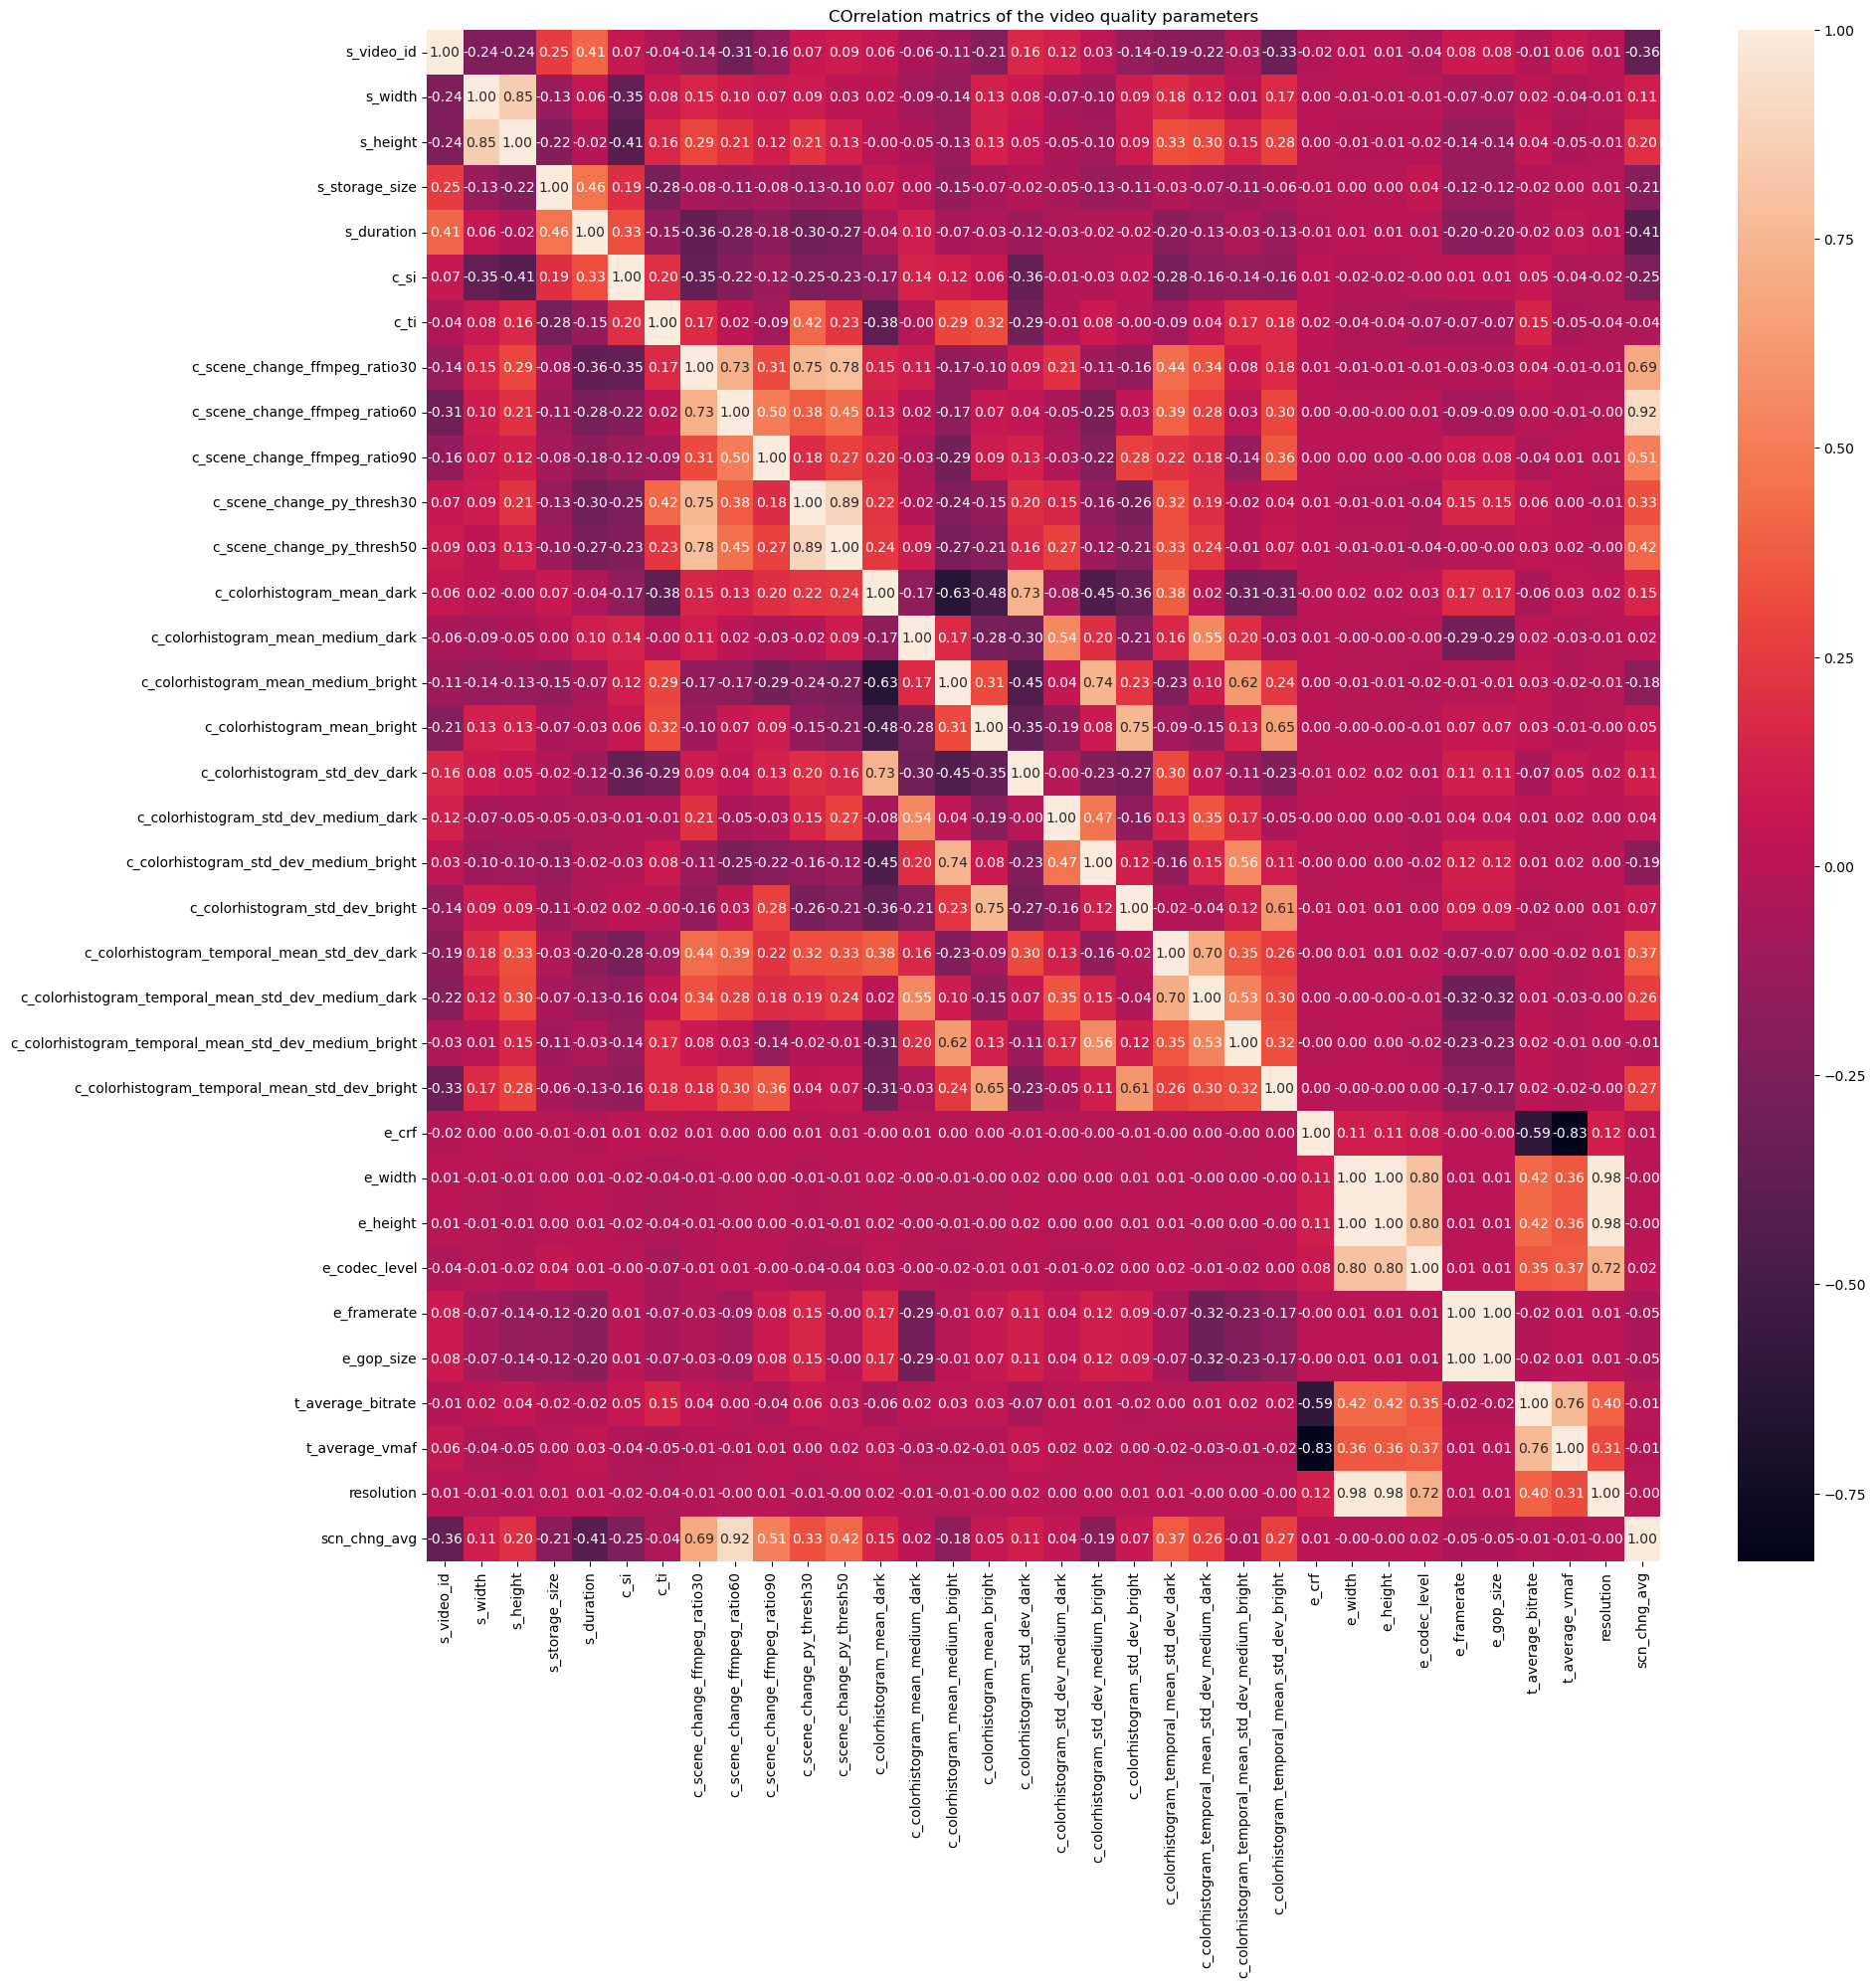

In [45]:
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr_df1_c, annot = True, fmt = '.2f', ax = ax )
plt.title("COrrelation matrics of the video quality parameters")
plt.savefig("/Users/user/One_to_one_techmentor_classes/video_quality_matrix_production/graphs/corr_mtrx.png", dpi=300, format='png')

In [46]:
dataset_final = pd.DataFrame({'scn_chng_avg':df1_c['scn_chng_avg'], 
                             's_video_id':df1_c['s_video_id'],
                             's_storage_size':df1_c['s_storage_size'],
                             's_duration':df1_c['s_duration'],
                             'e_crf':df1_c['e_crf'],
                             't_average_bitrate':df1_c['t_average_bitrate'],
                             't_average_vmaf':df1_c['t_average_vmaf'],
                             'resolution':df1_c['resolution'],
                             's_width':df1_c['s_width'],
                             's_height':df1_c['s_height'],
                             'e_framerate':df1_c['e_framerate']
                             })

In [47]:
dataset_final.columns

Index(['scn_chng_avg', 's_video_id', 's_storage_size', 's_duration', 'e_crf',
       't_average_bitrate', 't_average_vmaf', 'resolution', 's_width',
       's_height', 'e_framerate'],
      dtype='object')

In [48]:
dataset_final.dropna(inplace = True)

In [49]:
dataset_final.head()

,scn_chng_avg,s_video_id,s_storage_size,s_duration,e_crf,t_average_bitrate,t_average_vmaf,resolution,s_width,s_height,e_framerate
1,0.852071,8,521709628,65.0,40,139.0,16.131526,230400,1920,1080,50.0
2,0.852071,8,521709628,65.0,40,277.0,26.354270,518400,1920,1080,50.0
3,0.852071,8,521709628,65.0,40,458.0,33.988482,921600,1920,1080,50.0
4,0.852071,8,521709628,65.0,40,999.0,47.304090,2073600,1920,1080,50.0
5,0.852071,8,521709628,65.0,35,115.0,11.794007,97344,1920,1080,50.0


In [50]:
dataset_final.shape

(7098, 11)

In [51]:
dataset_final1 = dataset_final.drop(['s_video_id'], axis=1)

In [52]:
X = np.array(dataset_final1.drop(['t_average_vmaf'], axis=1))

In [53]:
X = preprocessing.scale(X)
print(X)
X.shape

[[-0.4737407  -0.2247032  -0.55027105 ...  0.34182049  0.25667182
  -0.44436124]
 [-0.4737407  -0.2247032  -0.55027105 ...  0.34182049  0.25667182
  -0.44436124]
 [-0.4737407  -0.2247032  -0.55027105 ...  0.34182049  0.25667182
  -0.44436124]
 ...
 [-0.76889866  0.50956844  0.35161296 ...  0.34182049  0.25667182
  -0.44641984]
 [-0.76889866  0.50956844  0.35161296 ...  0.34182049  0.25667182
  -0.44641984]
 [-0.76889866  0.50962806  0.35161296 ...  0.34182049  0.25667182
  -0.44641984]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(7098, 9)

In [54]:
Y = np.array(dataset_final1['t_average_vmaf'])
Y.shape
print(Y)

[16.131526 26.35427  33.988482 ... 44.293122 95.0999   74.45696 ]


In [62]:
def cross_score():
    svm_cross = svm.SVR()
    LRcross = LinearRegression()
    RF_cross = RandomForestRegressor(n_estimators = 1000)
    
    scorr_svr = cross_val_score(svm_cross, X, Y, cv = 10)
    LR_cross = cross_val_score(LRcross, X, Y, cv = 10)
    RF_cross = cross_val_score(RF_cross, X, Y, cv = 10)
    print(scorr_svr, LR_cross, RF_cross)
cross_score()

[0.83138803 0.94410328 0.93642178 0.90813575 0.96077287 0.95764031
 0.85621861 0.84146163 0.85401617 0.59687223] [0.84111128 0.87769967 0.87619016 0.87460869 0.90268088 0.89164092
 0.83441463 0.87529065 0.88012677 0.85522474] [0.96220303 0.98803826 0.98910844 0.96553951 0.99127098 0.99090255
 0.95357323 0.99313692 0.99263198 0.94545754]


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [64]:
X_train.shape

(5678, 9)

In [65]:
X_test.shape

(1420, 9)

In [66]:
y_train.shape

(5678,)

In [67]:
y_test.shape

(1420,)

--------------------------
Corr_SVR: 0.963
MAE_SVR:  6.267
MSE_SVR:  74.944
RMSE_SVR: 8.657
R2_SVR:   0.924
--------------------------
--------------------------
Corr_LR: 0.939
MAE_LR:  8.702
MSE_LR:  116.830
RMSE_LR: 10.809
R2_LR:   0.881
--------------------------
--------------------------
Corr_RF: 0.995
MAE_RF:  2.190
MSE_RF:  9.661
RMSE_RF: 3.108
R2_RF:   0.990
--------------------------
*************Confidence********
--------------------------
confidence_SVR: 0.9236943055042776
--------------------------
confidence_LR: 0.8810475109358029
--------------------------
confidence_RF: 0.9901630615831352
--------------------------


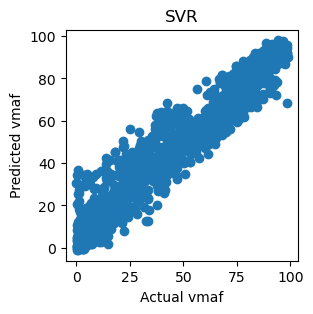

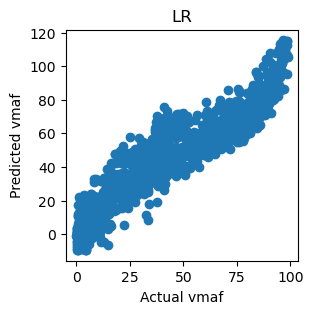

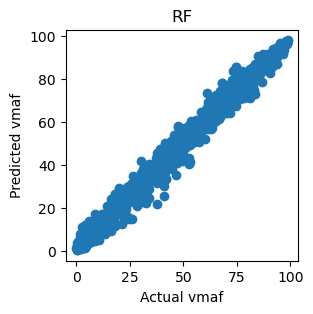

In [69]:
def ML_model(X_train,y_train,X_test,y_test):
    
    SVR = svm.SVR()
    LR = LinearRegression()
    RF = RandomForestRegressor(n_estimators=1000)
    
    SVR.fit(X_train, y_train)
    LR.fit(X_train, y_train)
    RF.fit(X_train, y_train)
    
    predict_SVR =SVR.predict(X_test)
    predict_LR=LR.predict(X_test)
    predict_RF=RF.predict(X_test)
    
    Result_svr = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_SVR":predict_SVR})], axis = 1)
    Result_lr = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_LR":predict_LR})], axis = 1)
    Result_rf = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_RF":predict_RF})], axis = 1)
    
    confidence_SVR = SVR.score(X_test, y_test)
    confidence_LR = LR.score(X_test, y_test)
    confidence_RF = RF.score(X_test, y_test)
    
    lst1 =["SVR","LR","RF"]
    lst = [predict_SVR,predict_LR,predict_RF]
    for idx, val in enumerate(lst):
        Corr = np.corrcoef(y_test,val)[0][1]
        MSE1 = MSE(y_test, val)
        MAE1 = MAE(y_test, val)
        RMSE = np.sqrt(MSE1)
        R2 = r2_score(y_test,val)
        print("--------------------------")
        print("Corr_{}: {:.3f}" .format(lst1[idx],Corr))
        print("MAE_{}:  {:.3f}" .format(lst1[idx],MAE1))
        print("MSE_{}:  {:.3f}" .format(lst1[idx],MSE1))
        print("RMSE_{}: {:.3f}" .format(lst1[idx],RMSE))
        print("R2_{}:   {:.3f}" .format(lst1[idx],R2))
        print("--------------------------")
        figure = plt.subplots(figsize=(3,3))
        plt.scatter(y_test,val)
        plt.xlabel("Actual vmaf")
        plt.ylabel("Predicted vmaf")
        plt.title("%s" %lst1[idx])
    print("*************Confidence********")
    print("--------------------------")
    print("confidence_SVR:",confidence_SVR)
    print("--------------------------")
    print("confidence_LR:",confidence_LR)
    print("--------------------------")
    print("confidence_RF:",confidence_RF)
    print("--------------------------")
ML_model(X_train,y_train,X_test,y_test)